In [4]:
import torch
import torchaudio
import os
import sys
sys.path.append('C:\\Users\\raghu\\test\\DNSSgit\\DNN-based_source_separation\\src')
sys.path.append('C:\\Users\\raghu\\test\\DNSSgit\\DNN-based_source_separation\\egs\\tutorials')


In [5]:

train_dataset = torchaudio.datasets.LibriMix(root='D:\\LibriMixData\\', subset= 'train-360', num_speakers = 2, 
                                  sample_rate = 8000, task = 'sep_noisy', mode='max')


valid_dataset = torchaudio.datasets.LibriMix(root='D:\\LibriMixData\\', subset= 'dev', num_speakers = 2, 
                                  sample_rate = 8000, task = 'sep_noisy', mode='max')

In [128]:
class TrainDataLoader(torch.utils.data.DataLoader):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

def collate_fn(batch):
    print(type(batch))
    print(type(batch[0]))
    print(type(batch[0][1]))
    print(type(batch[0][2][0]))
    tensor_length=torch.zeros(len(batch))
    for i in range(len(batch)):
        tensor_length[i] = batch[i][1].size()[1]
    l = int(torch.min(tensor_length).item())
    print(tensor_length,l)
    y_list=torch.empty(len(batch),1,l)
    z_list=torch.empty(len(batch),1,l)
    for i in range(len(batch)):
        print(i)
        y = torch.Tensor(batch[i][1][0,:l])
        z = [torch.Tensor(batch[i][2][0][0,:l]) ,torch.Tensor(batch[i][2][1][0,:l])]
        print(y.size())
        print(z[0].size(), z[1].size())
        y_list[i,:,:]=y
        z_list[i,0,:]=z[0]
        z_list[i,1,:]=z[1]  #.append(y)
       # z_list.append(z)


    return y_list,z_list
    

In [132]:
train_dl= TrainDataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
for idx, (a,b) in enumerate(train_dl):
    print('Train  batch',idx, type(a[0]), type(b[0])) #a[0].size(), b[0][0].size())

#ds=valid_dataset
#print(ds)

<class 'list'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([121760., 128480., 128080., 126600.]) 121760
0
torch.Size([121760])
torch.Size([121760]) torch.Size([121760])
1
torch.Size([121760])
torch.Size([121760]) torch.Size([121760])
2
torch.Size([121760])
torch.Size([121760]) torch.Size([121760])
3
torch.Size([121760])
torch.Size([121760]) torch.Size([121760])
Train  batch 0 <class 'torch.Tensor'> <class 'list'>
<class 'list'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([ 98480., 118000.,  65800., 116000.]) 65800
0
torch.Size([65800])
torch.Size([65800]) torch.Size([65800])
1
torch.Size([65800])
torch.Size([65800]) torch.Size([65800])
2
torch.Size([65800])
torch.Size([65800]) torch.Size([65800])
3
torch.Size([65800])
torch.Size([65800]) torch.Size([65800])
Train  batch 1 <class 'torch.Tensor'> <class 'list'>
<class 'list'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([124600., 117880., 128080., 124440.]) 117880


KeyboardInterrupt: 

In [7]:
print(len(ds.files))

3000


In [8]:
samp=ds[0]
print(samp)
print(samp[0])
print(samp[1].size())
print(len(samp[2]))
print(samp[2][0].size())
print(samp[2][1].size())


(8000, tensor([[-0.0126, -0.0262, -0.0246,  ...,  0.0272,  0.0464,  0.0799]]), [tensor([[ 8.2397e-04,  1.1597e-03,  6.7139e-04,  ..., -6.7139e-04,
         -9.1553e-05,  3.6621e-04]]), tensor([[ 3.0518e-05, -3.0518e-04, -4.8828e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])])
8000
torch.Size([1, 46840])
2
torch.Size([1, 46840])
torch.Size([1, 46840])


In [9]:
import IPython.display as ipd

In [10]:
# Noisy input

for i in range(3):
    print('Sample: ',i)
    samp=ds[i]
    print(samp)
    print('Input to model')
    display(ipd.Audio(samp[1], rate=8000))
    print('Clean speech signals')
    display(ipd.Audio(samp[2][0], rate=8000))
    display(ipd.Audio(samp[2][1], rate=8000))
    print('Estimated noise signal')
    display(ipd.Audio(samp[1]-samp[2][0]-samp[2][1], rate=8000))

Sample:  0
(8000, tensor([[-0.0126, -0.0262, -0.0246,  ...,  0.0272,  0.0464,  0.0799]]), [tensor([[ 8.2397e-04,  1.1597e-03,  6.7139e-04,  ..., -6.7139e-04,
         -9.1553e-05,  3.6621e-04]]), tensor([[ 3.0518e-05, -3.0518e-04, -4.8828e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])])
Input to model


Clean speech signals


Estimated noise signal


Sample:  1
(8000, tensor([[-0.0040,  0.0050,  0.0114,  ..., -0.0005, -0.0032,  0.0062]]), [tensor([[-2.4414e-04, -3.6621e-04, -3.9673e-04,  ..., -3.0518e-05,
         -1.2207e-04, -1.8311e-04]]), tensor([[0.0005, 0.0008, 0.0005,  ..., 0.0000, 0.0000, 0.0000]])])
Input to model


Clean speech signals


Estimated noise signal


Sample:  2
(8000, tensor([[-0.0017, -0.0068, -0.0046,  ...,  0.0020,  0.0297,  0.0350]]), [tensor([[-0.0002, -0.0002, -0.0002,  ...,  0.0000,  0.0000,  0.0000]]), tensor([[0.0002, 0.0004, 0.0005,  ..., 0.0006, 0.0004, 0.0004]])])
Input to model


Clean speech signals


Estimated noise signal


In [ ]:
from common.src.dataset import WaveTrainDataset, TrainDataLoader
# These are the actual speech signals
#train_dataset = WaveTrainDataset(args.wav_root, args.train_json_path)
#valid_dataset = WaveTrainDataset(args.wav_root, args.valid_json_path)
#print("Training dataset includes {} samples.".format(len(train_dataset)))
#print("Valid dataset includes {} samples.".format(len(valid_dataset)))

loader = {}
loader['train'] = TrainDataLoader(ds, batch_size=4, shuffle=True)
#loader['valid'] = TrainDataLoader(valid_dataset, batch_size=args.batch_size, shuffle=False)

In [11]:
import matplotlib.pyplot as plt
from IPython import display
import time

In [20]:
sig = samp[1]-samp[2][0]-samp[2][1]
#sig = samp[2][0]
n_fft=2048
print(sig.size())
window=torch.hann_window(n_fft)
out = torch.stft(sig, n_fft=n_fft, window=window,  normalized =True, onesided=True, return_complex =False)
print(out.size(), out.dtype)

energy = torch.norm(out,dim=3)**2
energy=torch.squeeze(energy)
print(energy.size())

torch.Size([1, 91840])
torch.Size([1, 1025, 180, 2]) torch.float32
torch.Size([1025, 180])


torch.Size([1, 91840])
torch.Size([1, 91840])
torch.Size([1, 91840])


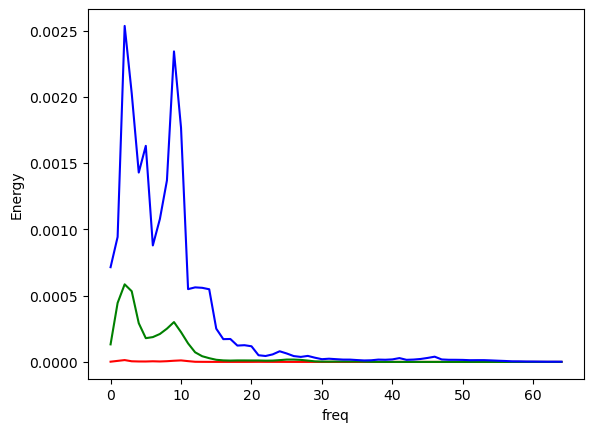

tensor(8.2141e-05)
tensor(0.0038)
tensor(0.0209)


In [21]:
def calculate_mean_energy(sig, n_fft=128, alpha=0.01):
    print(sig.size())
    window=torch.hann_window(n_fft)
    out = torch.stft(sig, n_fft=n_fft, window=window,  normalized =True, onesided=True, return_complex =False)
    energy = torch.norm(out,dim=3)**2
    energy=torch.squeeze(energy)    
    mean_energy=energy[:,0]
    for i in range(energy.size()[1]): #energy.size()[1]):
        mean_energy = mean_energy +alpha*(energy[:,i]-mean_energy)
    return mean_energy

# enable interactive mode
plt.ion()
 


speech_psd1 = calculate_mean_energy(samp[2][0])
speech_psd2 = calculate_mean_energy(samp[2][1])

noise_psd = calculate_mean_energy(samp[1]-samp[2][0]-samp[2][1])
# setting labels
plt.xlabel("freq")
plt.ylabel("Energy")



#    plt.close()

plt.plot(speech_psd1.numpy(),'r')
plt.plot(speech_psd2.numpy(),'g')
plt.plot(noise_psd.numpy(),'b')

plt.show()
print(torch.sum(speech_psd1))
print(torch.sum(speech_psd2))
print(torch.sum(noise_psd))
#plt.show()